<h1><center> Network/Graph Analysis in Python </center></h1>

**NetworkX**: Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Installation: 
`$ pip install networkx`

Version check in Python:
`networkx.__version__`

Upgrade:
`$ pip install networkx --upgrade`

**nxviz**: network visualization package

Installation:
`$ pip install nxviz`

In [1]:
import numpy as np
import __________ as nx       ## replace "_______" with the rlevant library
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter

%matplotlib inline

**Some open source network data locations:**

* **graph examples embedded in NetworkX:**
    * Zachary's Karate Club: `nx.karate_club_graph()`
    * Davis Southern women social network: `nx.davis_southern_women_graph()`
    *  Florentine families: `nx.florentine_families_graph()`
    * more examples: https://networkx.github.io/documentation/networkx-1.9/examples/index.html


## I. Networks Basics

#  <font color='red'>Complete the cells below, so as to implement the instructions as given in comments in the respective cells </font>

### 1. Create & Manipulate Networks 

Let's start with simple undirected and unweighted networks. An example of such networks, where we don't have edge direction (in/out) or edge weight (indicating how strong a connection is), would be the Facebook network. If you are a friend of mine, I am a friend of yours, and the edge connecting us is either 1 (connected) or non-existent (not connected). We will generate more complex networks later on.

**Nodes**: can represent anything (images, webpage URL links, people, power stations, numbers, words, etc.)

**Edges**: represent relationships between nodes

In [2]:
# create empty network


In [3]:
# add one node with label '1'


In [7]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 4, 'Alice', 'Mary'])

In [9]:
# remove node


In [10]:
# remove multiple nodes
G.remove_nodes_from(['Mary', 1])

In [ ]:
# view nodes in network G
G.nodes

In [ ]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist

# replace the `_____` and use the appropriat function

G.__________('Mary','Steven')

In [13]:
# add multiple of edges (list of tuples)
G.____________([('Mary', 'Steven') , ('Mary', 'Alice')])

In [14]:
# view edges in network G
G.edges

EdgeView([('Alice', 'Mary'), ('Mary', 'Steven')])

In [ ]:
# remove edge
G.remove_edge('Mary','Alice')

In [ ]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [ ]:
# get number of nodes in network G
G.number_of_nodes()

In [ ]:
# get number of edges in network G
G._________()

In [ ]:
# get Alice's number of neighbors (connections)
G.___________('Alice')

In [ ]:
# empty the network
G.clear()

**Load network from file.** You can read/write a graph in a file using common graph formats (edge lists, adjacency lists, GML, GraphML, pickle, LEDA, etc.).

To see how to read different types of adjancency formats, check here: https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html

In [27]:
# input edgelist from file
G = nx.______________("../datafiles/social/facebook/fb.txt")

In [29]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [30]:
list(dict_neighbors)

['1',
 '3',
 '7',
 '9',
 '11',
 '12',
 '16',
 '17',
 '18',
 '23',
 '51',
 '53',
 '479',
 '1079',
 '1132',
 '1237',
 '1645',
 '2053',
 '2054',
 '2055',
 '2056',
 '2057',
 '2058',
 '2059',
 '2060',
 '2061']

In [ ]:
# find shortest path between 2 given nodes


In [ ]:
# find the average shortest path length in graph
nx.______________

In [ ]:
# number of total edges in graph
len(G.nodes),len(G.edges)

In [ ]:
#calculate the pearson correlation coefficient
nx.____________(G)

In [ ]:
# clustering coefficient of the network
cc = nx.___________(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

In [ ]:
# check whether the network is connected or not
nx.______________(G)

In [ ]:
# find number of connected components
nx.______________(G)

In [ ]:
# get the nodes in the same component as *n*
nx._______________

## IV. Queries On Networks

* find specific nodes
* find specific edges

In [ ]:
# obtain a list of nodes with a certain property
sub_nodes = [n[0] for n in G.nodes(data=True) if d[________] == ____________]

In [ ]:
# obtain a list of edges with a certain property
sub_edges = [________ for edge in ____________ if d['attribute'] == 'what we are interested in']

In [ ]:
# find cliques in a given graph

In [ ]:
# Obtain an induced subgraph or an egecentric graph (a special case of induced subgraph) from a given graph, 
# as demonstrated in live coding

In [ ]:
# with_labels=True to show node labels
nx.draw(G_sub, with_labels=True)

## V. Case Studies - Real Network Analysis from Data 

### V. 1. Social Networks - Facebook Pages
using ***Graph Embedding with Self Clustering: Facebook data*** 

- data location: SNAP (Stanford Large Network Dataset Collection)
- source: B. Rozemberczki, R. Davies, R. Sarkar and C. Sutton. GEMSEC: Graph Embedding with Self Clustering. 2018.

<img src="../images/data.png" alt="Data" style="width: 300px;"/>

* nodes: pages
* edges: mutual likes among them -> this means undirected & networks


There are 8 different networks representing different categories. For our current analysis, we will analyze and compare 4 networks `Company`, `Artist`, `Politician` and `Public Figure`, however, you can play with all of them to get used to manipulating networks and computing structural property measures, and to gain insights about the data.

### a. Load network from file

In [3]:
# load edgelists from data file
co_net = nx.______________("datafiles/social/facebook/facebook_clean_data/company_edges.csv", delimiter=',')
art_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/artist_edges.csv", delimiter=',')
poli_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/politician_edges.csv", delimiter=',')
pub_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/public_figure_edges.csv", delimiter=',')

0.0

### b. Analyze network

In [13]:
# check number of nodes and edges 
N = len(poli_net.nodes)
print(N,list(poli_net.nodes)[:10])

E = len(poli_net.edges)
print(E)

5908 ['0', '1972', '5111', '138', '3053', '1473', '4978', '4523', '2334', '1038']
41729


Let's see what is on average the number of mutual 'Likes' (connections) each page (node) has. 

In [5]:
# calculate average degree of politician pages
degrees = ______________________
kavg = np.mean(degrees)
print("The # of mutual likes politician pages have on average:", kavg)

# calculate average degree of artist pages
degrees = ________________________
kavg = np.mean(degrees)
print("The # of mutual likes artist pages have on average:", kavg)

# calculate average degree of company pages
degrees = ___________________________
kavg = np.mean(degrees)
print("The # of mutual likes company pages have on average:", kavg)

# calculate average degree of public figure pages
degrees = [deg for node, deg in nx.degree(pub_net)]
kavg = np.mean(degrees)
print("The # of mutual likes public figure pages have on average:", kavg)

The # of mutual likes politician pages have on average: 14.126269465132024
The # of mutual likes artist pages have on average: 32.43812728892408
The # of mutual likes company pages have on average: 7.413023453553461
The # of mutual likes public figure pages have on average: 11.606398616515348


What about the degree distribution in the networks?

- Based on the session in the class, perform the following:
    - Is any of the above a heavy-tailed degree distribution?
    - Plot the PDF, CDF, CCDF, with and without log scales and explain which plot works best to investigate the data.


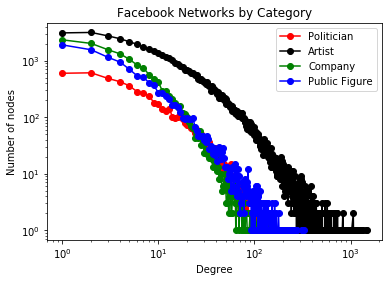

In [8]:
# Find degree distribution of the networks
hist_poli = _________(poli_net)
hist_art = __________(art_net)
hist_co = __________(co_net)
hist_pub = __________(pub_net)

## loglog degree distribution of nodes

plt.figure()
plt.______(hist_poli.T[0],hist_poli.T[1],'ro-')
plt.______(hist_art.T[0],hist_art.T[1],'ko-')
plt.______(hist_co.T[0],hist_co.T[1],'go-')
plt.______(hist_pub.T[0],hist_pub.T[1],'bo-')
plt.legend(['Politician', 'Artist', 'Company', 'Public Figure'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Networks by Category')
plt.savefig('fb_network_degree_distr.png')

In [9]:
# check assortativity
print("Politician network assortativity: {}".format(nx.____________(poli_net)))
print("Artist network assortativity: {}".format(nx.___________(art_net)))
print("Company network assortativity: {}".format(nx.________(co_net)))
print("Public figure network assortativity: {}".format(nx.____________(pub_net)))

Politician network assortativity: 0.0182443427670884
Artist network assortativity: -0.01906626068251133
Company network assortativity: 0.012977786248196819
Public figure network assortativity: 0.202161548290631


In [10]:
# check clustering coefficient
cc = nx._______(poli_net)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Politician network clustering coefficient:", avg_cc_poli)

cc = nx.__________(art_net)
avg_cc_art = sum(cc.values()) / len(cc)
print("Artist network clustering coefficient:", avg_cc_art)

cc = nx.____________(co_net)
avg_cc_co = sum(cc.values()) / len(cc)
print("Company network clustering coefficient:", avg_cc_co)

cc = nx._________(pub_net)
avg_cc_pub = sum(cc.values()) / len(cc)
print("Public figure network clustering coefficient:", avg_cc_pub)

Politician network clustering coefficient: 0.385096125793274
Artist network clustering coefficient: 0.13812042114553588
Company network clustering coefficient: 0.2392418380399809
Public figure network clustering coefficient: 0.17934725117824554
